Text(0, 0.5, 'y')

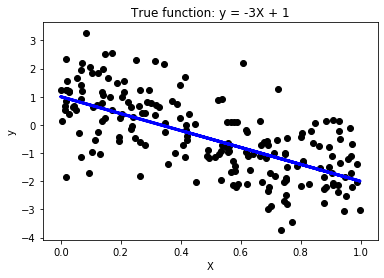

In [1]:
#Model 5 : Regression
# quantiative-valued target attributes를 predict 하기 위한 modeling technique





#5.1 Synthetic Data Generation

# Linear regression이 작동하는지 설명하기 위해 먼저 균일한 분포로부터 예측 변수 x의 랜덤 1차원 벡터를 생성한다.
# Response variable y는 -3x + 1 + 엡실론 등식에 따라 x와 선형 관계를 가지며 
# 여기서 엡실론은 평균 0과 표준 편차가 1인 가우스 분포에서 표본으로 추출된 랜덤 노이즈에 해당한다.


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


seed = 1                #랜덤값 생성을 위한 시드값
numInstances = 200      #데이터 인스턴스 수
np.random.seed(seed) 
X = np.random.rand(numInstances,1).reshape(-1,1)
y_true = -3*X + 1
y = y_true + np.random.normal(size=numInstances).reshape(-1,1)


plt.scatter(X, y, color='black')
plt.plot(X, y_true, color='blue', linewidth=3)
plt.title('True function: y = -3X + 1') 
plt.xlabel('X')
plt.ylabel('y')

In [2]:
# 5.2 Multiple Linear Regression

# 이 예에서는 다중 선형 회귀 분석(MLR) 모형을 적합시키기 위해 Python Scikit-learn 패키지를 사용하는 방법을 설명한다. 
# Training set {X,y}이 주어지고, MLR은 Regression function f(X,w)을 학습하도록 설계됨
# loss function을 최소화하면서




#입력 데이터 세트를 고려하여 다음 단계를 수행하십시오.
# 1. 입력 데이터를 각 training and test set으로 나눔.
# 2. training data에 다중 선형 회귀 분석을 fitting.
# 3. test data에 모델을 적용한다.
# 4. 모델의 성능을 평가한다.
# 5. 후처리(Postprocessing) : fitted model을 시각화한다.


# Step1 : training and test 나누기

numTrain = 20           #training 인스턴스의 수
numTest = numInstances - numTrain

X_train = X[:-numTest] 
X_test = X[-numTest:] 
y_train = y[:-numTest]
y_test = y[-numTest:]

In [3]:
# Step 2 : training set을 회귀모델에 fit

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


# linear regression 객체 생성
regr = linear_model.LinearRegression()


# training set에 regression model을 fitting
regr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
# Step 3: Test set에 모델 적용

y_pred_test = regr.predict(X_test)

Root mean squared error = 1.0476
R-squared = 0.4443


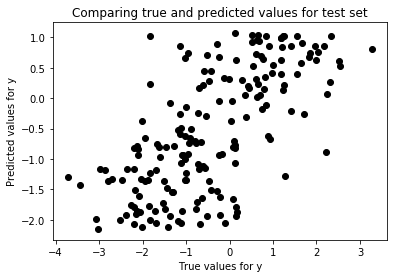

In [5]:
# Step 4: Test set에 대해 모델 평가

#true  vs  predicted values 를 비교한다.
plt.scatter(y_test, y_pred_test, color='black') 
plt.title('Comparing true and predicted values for test set') 
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')


print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

Slope =  -3.242354544656501
Intercept =  1.0805993038584834


Text(0, 0.5, 'y')

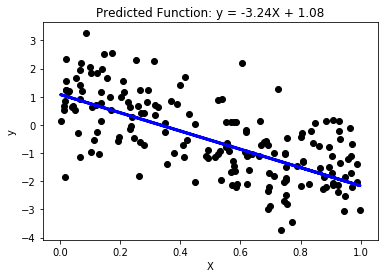

In [6]:
# Step 5: Postprocessing


# Display model parameters
print('Slope = ', regr.coef_[0][0]) 
print('Intercept = ', regr.intercept_[0])      ## Step 4 : Postprocessing


#Plot outputs
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred_test, color='blue', linewidth=3)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_[0], regr.intercept_[0]) 
plt.title(titlestr)
plt.xlabel('X')
plt.ylabel('y')


Text(0.5, 1.0, 'Correlation between X4 and X5 = ')

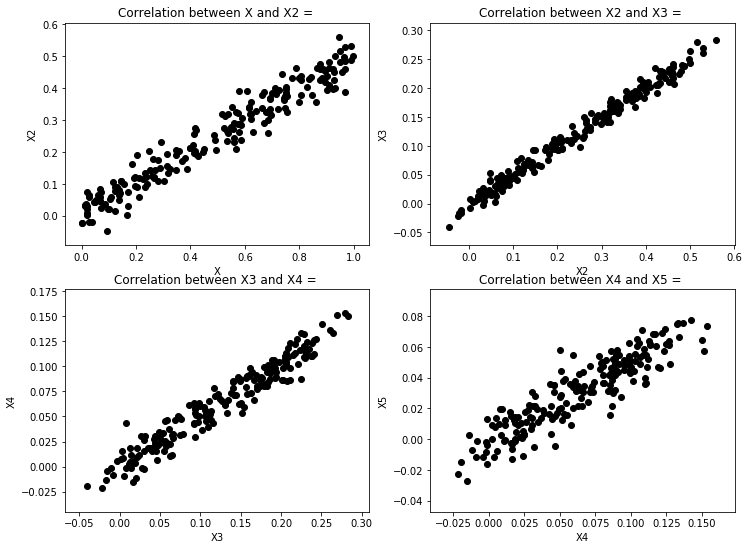

In [7]:
# 5.3 : Effect of Correlated Attributes

# 이 예에서는 Correlated Attributes 의 존재가 회귀 모형의 성능에 어떤 영향을 미칠 수 있는지를 설명한다.
# 구체적으로 섹션 5.1에서 생성된 변수 X와 strongly correlated 된 X2, X3, X4 및 X5의 4개의 변수를 추가로 생성한다. 
# X와 y의 관계는 전과 같다. 그런 다음 y를 predictor변수에 fitting시키고 이들의 training 및 test set 오류를 비교한다.


# 먼저, 우리는 아래에 Correlated Attributes을 만든다.

seed = 1
np.random.seed(seed)
X2 = 0.5*X + np.random.normal(0, 0.04, size=numInstances).reshape(-1,1)
X3 = 0.5*X2 + np.random.normal(0, 0.01, size=numInstances).reshape(-1,1) 
X4 = 0.5*X3 + np.random.normal(0, 0.01, size=numInstances).reshape(-1,1) 
X5 = 0.5*X4 + np.random.normal(0, 0.01, size=numInstances).reshape(-1,1)


fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(12,9))
ax1.scatter(X, X2, color='black')
ax1.set_xlabel('X')
ax1.set_ylabel('X2')
c = np.corrcoef(np.column_stack((X[:-numTest],X2[:-numTest])).T) 
titlestr = 'Correlation between X and X2 = ' % (c[0,1]) 
ax1.set_title(titlestr)


ax2.scatter(X2, X3, color='black')
ax2.set_xlabel('X2')
ax2.set_ylabel('X3')
c = np.corrcoef(np.column_stack((X2[:-numTest],X3[:-numTest])).T) 
titlestr = 'Correlation between X2 and X3 = ' % (c[0,1]) 
ax2.set_title(titlestr)


ax3.scatter(X3, X4, color='black')
ax3.set_xlabel('X3')
ax3.set_ylabel('X4')
c = np.corrcoef(np.column_stack((X3[:-numTest],X4[:-numTest])).T) 
titlestr = 'Correlation between X3 and X4 = ' % (c[0,1]) 
ax3.set_title(titlestr)


ax4.scatter(X4, X5, color='black')
ax4.set_xlabel('X4')
ax4.set_ylabel('X5')
c = np.corrcoef(np.column_stack((X4[:-numTest],X5[:-numTest])).T)
titlestr = 'Correlation between X4 and X5 = ' % (c[0,1])
ax4.set_title(titlestr)

In [8]:
#다음으로, 우리는 training and test sets의 4가지 버전을 추가로 만든다.
#첫 번째 버전인 X_train2와 X_test2에는 두 개의 Correlated predictor(상관된 예측) 변수인 X와 X2가 있다. 
#두 번째 버전인 X_train3과 X_test3은 3개의 Correlated predictor 변수인 X, X2, X3을 가지고 있다. 
#세 번째 버전은 X, X2, X3, X4 4개의 Correlated 변수를 가지고 있는 반면, 
#마지막 버전은 X, X2, X3, X4 및 X5의 Correlated 변수를 5개 가지고 있다.


X_train2 = np.column_stack((X[:-numTest],X2[:-numTest]))
X_test2 = np.column_stack((X[-numTest:],X2[-numTest:]))
X_train3 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest]))
X_test3 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:]))
X_train4 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest],X4[:-numTest]))
X_test4 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:],X4[-numTest:]))
X_train5 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest],X4[:-numTest],X5[:-numTest ]))
X_test5 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:],X4[-numTest:],X5[-numTest :]))



In [10]:
# 아래에서는 이전 단계에서 생성된 4가지 버전의 training and test 데이터를 기반으로 4가지 새로운 회귀 모델을 train한다.

regr2 = linear_model.LinearRegression() 
regr2.fit(X_train2, y_train)

regr3 = linear_model.LinearRegression() 
regr3.fit(X_train3, y_train)

regr4 = linear_model.LinearRegression() 
regr4.fit(X_train4, y_train)

regr5 = linear_model.LinearRegression() 
regr5.fit(X_train5, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# 그런 다음 4가지 버전의 회귀 모델을 모두 training and test 세트에 적용한다.

y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test) 
y_pred_train2 = regr2.predict(X_train2)
y_pred_test2 = regr2.predict(X_test2) 
y_pred_train3 = regr3.predict(X_train3)
y_pred_test3 = regr3.predict(X_test3)
y_pred_train4 = regr4.predict(X_train4) 
y_pred_test4 = regr4.predict(X_test4)
y_pred_train5 = regr5.predict(X_train5)
y_pred_test5 = regr5.predict(X_test5)

,Model,Train error,Test error,Sum of Absolute Weights
0,-3.24 X + 1.08,0.891873,1.047626,4.322954
1,-5.90 X + 5.92 X2 + 1.00,0.856157,1.087601,12.817040
2,-6.22 X + -2.30 X2 + 17.14 X3 + 1.08,0.834238,1.094661,26.744867
3,-7.16 X + 0.93 X2 + 8.39 X3 + 11.85 X4 + 1.12,0.825722,1.128861,29.453660
4,-7.16 X + 4.50 X2 + 3.52 X3 + -6.55 X4 + 25.68...,0.799399,1.146546,48.614927


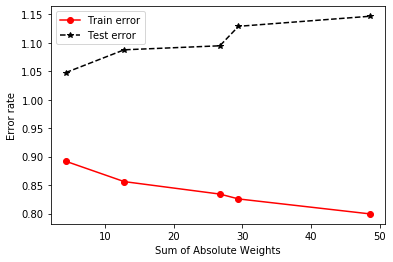

In [12]:
#후처리를 위해 우리는 모델의 training error와 test error를 모두 계산한다.
#또한 regression coefficient의 절대 가중치의 합과 resulting model 을 보일 수 있다.

import pandas as pd
import matplotlib.pyplot as plt

columns = ['Model', 'Train error', 'Test error', 'Sum of Absolute Weights']
model1 = "%.2f X + %.2f" % (regr.coef_[0][0], regr.intercept_[0])
values1 = [ model1, np.sqrt(mean_squared_error(y_train, y_pred_train)), np.sqrt(mean_squared_error(y_test, y_pred_test)), np.absolute(regr.coef_[0]).sum() + np.absolute(regr.intercept_[0])]


model2 = "%.2f X + %.2f X2 + %.2f " % (regr2.coef_[0][0], regr2.coef_[0][1], regr2.intercept_[0])
values2 = [ model2, np.sqrt(mean_squared_error(y_train, y_pred_train2)), np.sqrt(mean_squared_error(y_test, y_pred_test2)), np.absolute(regr2.coef_[0]).sum() + np.absolute(regr2.intercept_[0])]


model3 = "%.2f X + %.2f X2 + %.2f X3 + %.2f " % (regr3.coef_[0][0], regr3.coef_[0][1], regr3.coef_[0][2], regr3.intercept_[0])
values3 = [ model3, np.sqrt(mean_squared_error(y_train, y_pred_train3)), np.sqrt(mean_squared_error(y_test, y_pred_test3)), np.absolute(regr3.coef_[0]).sum() + np.absolute(regr3.intercept_[0])]


model4 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f " % (regr4.coef_[0][0], regr4.coef_[0][1], regr4.coef_[0][2], regr4.coef_[0][3], regr4.intercept_[0])
values4 = [ model4, np.sqrt(mean_squared_error(y_train, y_pred_train4)),np.sqrt(mean_squared_error(y_test, y_pred_test4)), np.absolute(regr4.coef_[0]).sum() + np.absolute(regr4.intercept_[0])]
model5 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f " % (regr5.coef_[0][0], regr5.coef_[0][1], regr5.coef_[0][2],regr5.coef_[0][3], regr5.coef_[0][4], regr5.intercept_[0])



values5 = [ model5, np.sqrt(mean_squared_error(y_train, y_pred_train5)),np.sqrt(mean_squared_error(y_test, y_pred_test5)), np.absolute(regr5.coef_[0]).sum() + np.absolute(regr5.intercept_[0])]




results = pd.DataFrame([values1, values2, values3, values4, values5], columns=columns)

plt.plot(results['Sum of Absolute Weights'], results['Train error'], 'ro-')
plt.plot(results['Sum of Absolute Weights'], results['Test error'], 'k*--') 
plt.legend(['Train error', 'Test error'])
plt.xlabel('Sum of Absolute Weights')
plt.ylabel('Error rate') 
results

In [13]:
# 위의 결과는 "X에 대해서만" y를 fitting시키는 첫 번째 모델이 가장 큰 training 오차를 가지고 있지만 가장 작은 test 오차를 가지고 있는 반면, 
# "X와 other correlated 속성에 대해" y를 fitting시키는 다섯 번째 모델은 training 오차는 가장 작지만 가장 큰 test 오차를 가지고 있다는 것을 보여준다.
# 이는 모델의 낮은 training 오차가 이전에 보지 못한 테스트 인스턴스에서 모델이 얼마나 잘 수행될 것인지를 반영하지 못하는 모델 오버피팅이라고 알려진 현상에 기인한다. 
# 위에 표시된 그림에서 모형의 절대 가중치(모형의 복잡성을 나타내는) 합이 증가함에 따라 training 오류와 test 오류 사이의 차이가 더 넓어지는 것을 관찰하십시오.
# 따라서 회귀 모형의 복잡성을 제어하여 모형이 overfitting되는 문제를 방지해야 한다.








#5.4 Ridge Regression

# 리지 회귀 분석은 다음과 같은 정규화된 최소 제곱 손실 함수를 최소화하여 데이터 집합에 선형 모형을 fitting시키도록 설계된 MLR의 변형이다.

# 아래 예제에서, 우리는 상관된 속성을 가진 이전에 만들어진 training 세트에 능선 회귀 모형을 fitting시킨다.
# 우리는 능선 회귀 분석 모델의 결과를 MLR을 사용하여 얻은 것과 비교한다.


from sklearn import linear_model

ridge = linear_model.Ridge(alpha=0.4)
ridge.fit(X_train5, y_train)
y_pred_train_ridge = ridge.predict(X_train5) 
y_pred_test_ridge = ridge.predict(X_test5)


model6 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f " % (ridge.coef_[0][0], ridge.coef_[0][1], ridge.coef_[0][2],ridge.coef_[0][3], ridge.coef_[0][4], ridge.intercept_[0])
values6 = [ model6, np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)), np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)), np.absolute(ridge.coef_[0]).sum() + np.absolute(ridge.intercept_[0])]

ridge_results = pd.DataFrame([values6], columns=columns, index=['Ridge'])
pd.concat([results, ridge_results])



#하이퍼 파라미터에 적절한 값을 설정함으로써, 우리는 절대 가중치의 합을 제어할 수 있으며, 
# 따라서 상관된 속성 없이 MLR과 상당히 유사한 test error를 생성할 수 있다.

,Model,Train error,Test error,Sum of Absolute Weights
0,-3.24 X + 1.08,0.891873,1.047626,4.322954
1,-5.90 X + 5.92 X2 + 1.00,0.856157,1.087601,12.817040
2,-6.22 X + -2.30 X2 + 17.14 X3 + 1.08,0.834238,1.094661,26.744867
3,-7.16 X + 0.93 X2 + 8.39 X3 + 11.85 X4 + 1.12,0.825722,1.128861,29.453660
4,-7.16 X + 4.50 X2 + 3.52 X3 + -6.55 X4 + 25.68...,0.799399,1.146546,48.614927
Ridge,-2.24 X + -0.43 X2 + -0.14 X3 + -0.10 X4 + 0.0...,0.917456,1.052388,3.765759


In [14]:
# 5.5 Lasso Regression

#능선 회귀 분석의 한계 중 하나는 상관된 속성과 관련된 회귀 계수를 줄이고 model overfitting의 효과를 줄일 수 있었지만, 
# 결과 모델은 여전히 희박하지 않다는 것이다. Lasso 회귀 분석이라 불리는 또 다른 MLR variation는 다음과 같이 회귀 계수에 정규화를 적용하여 sparser 모델을 생성하도록 설계되었다.


#아래 예제 코드는 이전에 사용한 상관 관계 데이터 집합에 라소 회귀 분석을 적용한 결과를 보여준다.


from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.02) 
lasso.fit(X_train5, y_train) 
y_pred_train_lasso = lasso.predict(X_train5) 
y_pred_test_lasso = lasso.predict(X_test5)


model7 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f " % (lasso.coef_[0], lasso.coef_[1], lasso.coef_[2],lasso.coef_[3], lasso.coef_[4], lasso.intercept_[0]) 
values7 = [ model7, np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)),np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)), np.absolute(lasso.coef_[0]).sum() + np.absolute(lasso.intercept_[0])]

lasso_results = pd.DataFrame([values7], columns=columns, index=['Lasso']) 
pd.concat([results, ridge_results, lasso_results])


#라소 회귀 분석 모형이 관련 속성인 X2, X3, X4, X5에 대한 coefficients를 능선 회귀 모형과 달리 정확히 0으로 설정하는지 관찰하십시오. 
# 결과적으로, 시험 오차는 능선 회귀 분석의 오차보다 훨씬 더 좋다.

,Model,Train error,Test error,Sum of Absolute Weights
0,-3.24 X + 1.08,0.891873,1.047626,4.322954
1,-5.90 X + 5.92 X2 + 1.00,0.856157,1.087601,12.817040
2,-6.22 X + -2.30 X2 + 17.14 X3 + 1.08,0.834238,1.094661,26.744867
3,-7.16 X + 0.93 X2 + 8.39 X3 + 11.85 X4 + 1.12,0.825722,1.128861,29.453660
4,-7.16 X + 4.50 X2 + 3.52 X3 + -6.55 X4 + 25.68...,0.799399,1.146546,48.614927
Ridge,-2.24 X + -0.43 X2 + -0.14 X3 + -0.10 X4 + 0.0...,0.917456,1.052388,3.765759
Lasso,-2.90 X + 0.00 X2 + 0.00 X3 + 0.00 X4 + 0.00 X...,0.895692,1.043334,3.856242


In [15]:
# 5.6 Hyperparameter Selection via Cross-Validation

# ridge과 lasso 회귀 분석 방법 모두 model overfitting 문제를 잠재적으로 완화할 수 있지만, 문제 중 하나는 적절한 하이퍼 매개변수 값을 선택하는 방법이다. 
# 아래 예에서, 우리는 모델의 가장 좋은 하이퍼 매개변수를 선택하기 위해 5배 교차 검증 방법을 사용하는 예를 시연한다. 
# 모델 선택 문제와 교차 검증 방법에 대한 자세한 내용은 이 책의 3장에 설명되어 있다.
# 아래 첫 번째 샘플 코드에서는 ridge 회귀 분석의 하이퍼 파라미터를 0.2와 1.0 사이의 범위로 변경한다.
# RidgeCV() 함수를 사용하여 5배 교차 검증의 모델을 교육하고 최상의 하이퍼 파라미터 값을 선택할 수 있다.

from sklearn import linear_model

ridge = linear_model.RidgeCV(cv=5,alphas=[0.2, 0.4, 0.6, 0.8, 1.0]) 
ridge.fit(X_train5, y_train)
y_pred_train_ridge = ridge.predict(X_train5)
y_pred_test_ridge = ridge.predict(X_test5)

model6 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f " % (ridge.coef_[0][0], ridge.coef_[0][1], ridge.coef_[0][2],ridge.coef_[0][3], ridge.coef_[0][4], ridge.intercept_[0])

values6 = [ model6, np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)),np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)),np.absolute(ridge.coef_[0]).sum() + np.absolute(ridge.intercept_[0])] 

print("Selected alpha = %.2f " % ridge.alpha_)


ridge_results = pd.DataFrame([values6], columns=columns, index=['RidgeCV'])
pd.concat([results, ridge_results])

Selected alpha = 0.20 


,Model,Train error,Test error,Sum of Absolute Weights
0,-3.24 X + 1.08,0.891873,1.047626,4.322954
1,-5.90 X + 5.92 X2 + 1.00,0.856157,1.087601,12.817040
2,-6.22 X + -2.30 X2 + 17.14 X3 + 1.08,0.834238,1.094661,26.744867
3,-7.16 X + 0.93 X2 + 8.39 X3 + 11.85 X4 + 1.12,0.825722,1.128861,29.453660
4,-7.16 X + 4.50 X2 + 3.52 X3 + -6.55 X4 + 25.68...,0.799399,1.146546,48.614927
RidgeCV,-2.74 X + -0.16 X2 + 0.09 X3 + 0.01 X4 + 0.21 ...,0.899190,1.044401,4.112120


In [16]:
# 이 다음 예에서는 교차 검증을 적용하여 라소 회귀 모형을 fitting하기 위한 최상의 하이퍼 파라미터 값을 선택하는 방법을 예시한다.

from sklearn import linear_model

lasso = linear_model.LassoCV(cv=5, alphas=[0.01, 0.02, 0.05, 0.1, 0.3, 0.5, 1.0]) 
lasso.fit(X_train5, y_train.reshape(y_train.shape[0]))
y_pred_train_lasso = lasso.predict(X_train5)
y_pred_test_lasso = lasso.predict(X_test5)

model7 = " %.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f " % (lasso.coef_[0], lasso.coef_[1], lasso.coef_[2],lasso.coef_[3], lasso.coef_[4], lasso.intercept_) 
values7 = [ model7, np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)),np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)),np.absolute(lasso.coef_[0]).sum() + np.absolute(lasso.intercept_)]

print("Selected alpha = %.2f" % lasso.alpha_)
lasso_results = pd.DataFrame([values7], columns=columns, index=['LassoCV']) 
pd.concat([results, ridge_results, lasso_results])

Selected alpha = 0.01


,Model,Train error,Test error,Sum of Absolute Weights
0,-3.24 X + 1.08,0.891873,1.047626,4.322954
1,-5.90 X + 5.92 X2 + 1.00,0.856157,1.087601,12.817040
2,-6.22 X + -2.30 X2 + 17.14 X3 + 1.08,0.834238,1.094661,26.744867
3,-7.16 X + 0.93 X2 + 8.39 X3 + 11.85 X4 + 1.12,0.825722,1.128861,29.453660
4,-7.16 X + 4.50 X2 + 3.52 X3 + -6.55 X4 + 25.68...,0.799399,1.146546,48.614927
RidgeCV,-2.74 X + -0.16 X2 + 0.09 X3 + 0.01 X4 + 0.21 ...,0.899190,1.044401,4.112120
LassoCV,-3.07 X + 0.00 X2 + 0.00 X3 + 0.00 X4 + 0.00 ...,0.892829,1.043911,4.089598


In [ ]:
# 5.7 요약
# 이 절에서는 선형 회귀 모형을 데이터 집합에 적합시키기 위한 Python 코드 예제를 제시한다. 
# 우리는 또한 모델 오버피팅의 문제를 설명하고 그러한 문제를 완화하는 데 도움이 될 수 있는 두 가지 대안적인 방법인 능선과 라소 회귀법을 보여준다. 
# 여기에 표시된 모델 과적 문제는 상관된 속성의 맥락에서 설명되지만, 문제는 보다 일반적이며 데이터의 노이즈 및 기타 예외적 값과 같은 다른 요인에 의해 발생할 수 있다.